### EV Absorption Forecasting 

In [1]:
%pip install scikit-learn
# then restart the kernel and re-run cells


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/12.8 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.8 MB 3.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.8 MB 3.7 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.8 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.8 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.8 MB 4.0 MB


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Asys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import sys
print("Python executable:", sys.executable)
# After installing, check:
import sklearn
print("sklearn version:", sklearn.__version__)

Python executable: C:\Users\Asys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
sklearn version: 1.7.2


In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Load data
df = pd.read_csv("Electric_Vehicle.csv")
df.info()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load data
df = pd.read_csv("Electric_Vehicle.csv")
df.info()


df.isnull().sum()

# Converts the "Date" column to actual datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Removes rows where "Date" conversion failed
df = df[df['Date'].notnull()]

# Removes rows where the target (EV Total) is missing
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Confirm remaining nulls
print("Missing after fill:")
print(df[['County', 'State']].isnull().sum())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [ ]:
# Converts the "Date" column to actual datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Removes rows where "Date" conversion failed
df = df[df['Date'].notnull()]

# Removes rows where the target (EV Total) is missing
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Confirm remaining nulls
print("Missing after fill:")
print(df[['County', 'State']].isnull().sum())

df.head()


cols_to_convert = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles',
    'Percent Electric Vehicles'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_convert].describe()
df.info()



Missing after fill:
County    0
State     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20819 non-null  object        
 2   State                                     20819 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20266 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20468 non-null  float64       
 6   Electric Vehicle (EV) Total               20119 non-null  float64       
 7   Non-Electric Vehicle Total                13983 non-null  float64       
 8   Total Vehicles                            13979 n

In [ ]:
# Compute Q1 and Q3
Q1 = df['Percent Electric Vehicles'].quantile(0.25)
Q3 = df['Percent Electric Vehicles'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)


lower_bound: -3.5174999999999996
upper_bound: 6.9025


In [ ]:
# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

# Cap the outliers - it keeps all the data while reducing the skew from extreme values.

df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
 np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])



Number of outliers in 'Percent Electric Vehicles': 2476
Number of outliers in 'Percent Electric Vehicles': 0


In [ ]:
# Most EVs by County
top_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(3)
bottom_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values().head(3)

print("Top 3 Counties:\n", top_counties)
print("\nBottom 3 Counties:\n", bottom_counties)


Top 3 Counties:
 County
Clallam      39839.0
Jefferson    39683.0
San Juan     39309.0
Name: Electric Vehicle (EV) Total, dtype: float64

Bottom 3 Counties:
 County
Brown         1.0
Union         1.0
Hood River    1.0
Name: Electric Vehicle (EV) Total, dtype: float64


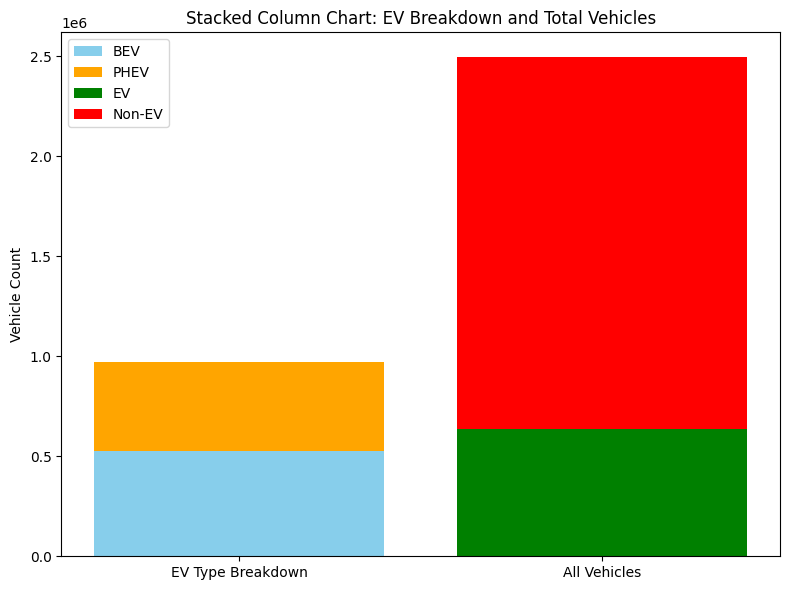

In [ ]:
# Total sums for stacked column chart
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()
all_total = df['Total Vehicles'].sum()

# Stacked column chart
fig, ax = plt.subplots(figsize=(8, 6))

# Stack EV types
ax.bar('EV Type Breakdown', bev_total, label='BEV', color='skyblue')
ax.bar('EV Type Breakdown', phev_total, bottom=bev_total, label='PHEV', color='orange')

# Stack Total Vehicle categories
ax.bar('All Vehicles', ev_total, label='EV', color='green')
ax.bar('All Vehicles', non_ev_total, bottom=ev_total, label='Non-EV', color='red')

# Final touches
ax.set_ylabel('Vehicle Count')
ax.set_title('Stacked Column Chart: EV Breakdown and Total Vehicles')
ax.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Extract year, month, and dat
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month  # For trend


In [ ]:

# Encode County
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])
df


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,numeric_date,county_encoded
0,2022-09-30,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.5000,2022,9,24273,224
1,2022-12-31,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.5700,2022,12,24276,214
2,2020-01-31,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.0300,2020,1,24241,62
3,2022-06-30,Ferry,WA,Truck,0.0,0.0,0.0,NaN,NaN,0.0000,2022,6,24270,85
4,2021-07-31,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.1900,2021,7,24259,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,2023-01-31,Rockingham,NH,Passenger,1.0,0.0,1.0,14.0,15.0,6.6700,2023,1,24277,227
20815,2020-07-31,Carson City,NV,Passenger,1.0,0.0,1.0,10.0,11.0,6.9025,2020,7,24247,38
20816,2022-02-28,Island,WA,Passenger,744.0,350.0,NaN,NaN,NaN,1.7300,2022,2,24266,119
20817,2020-12-31,San Diego,CA,Passenger,14.0,2.0,16.0,NaN,NaN,0.5800,2020,12,24252,234


In [ ]:
# Sort for lag creation
df = df.sort_values(['County', 'Date'])
df.tail()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,numeric_date,county_encoded
2948,2023-10-31,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,2023,10,24286,311
2761,2023-11-30,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,2023,11,24287,311
7360,2023-12-31,Yuba,CA,Passenger,1.0,0.0,1.0,44.0,45.0,2.22,2023,12,24288,311
262,2024-01-31,Yuba,CA,Passenger,1.0,0.0,1.0,43.0,44.0,2.27,2024,1,24289,311
7618,2024-02-29,Yuba,CA,Passenger,1.0,0.0,1.0,40.0,41.0,2.44,2024,2,24290,311


In [ ]:

# Assign time index per county
df['months_since_start'] = df.groupby('County').cumcount()

#Lags are only based on past data from the same county
# === Create lag features (1–3 months) ===
for lag in [1, 2, 3]:
    df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

# === Rolling average (3-month, prior) ===
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                               .transform(lambda x: x.shift(1).rolling(3).mean())

# === Percent change (no fill method) ===
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=1, fill_method=None)

df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=3, fill_method=None)

# === Clean up any infs/NaNs ===
df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)
df




,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
3923,2017-12-31,Ada,ID,Passenger,0.0,1.0,1.0,359.0,360.0,0.28,...,0,0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN
19390,2018-01-31,Ada,ID,Passenger,0.0,1.0,1.0,358.0,359.0,0.28,...,0,1,1.0,NaN,NaN,NaN,0.0,0.0,2.0,NaN
7549,2018-02-28,Ada,ID,Passenger,0.0,2.0,2.0,354.0,356.0,0.56,...,0,2,1.0,1.0,NaN,NaN,1.0,0.0,4.0,NaN
6698,2018-03-31,Ada,ID,Passenger,0.0,2.0,2.0,346.0,348.0,0.57,...,0,3,2.0,1.0,1.0,1.333333,0.0,1.0,6.0,NaN
16059,2018-04-30,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,0,4,2.0,2.0,1.0,1.666667,0.0,1.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2023-10-31,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,...,311,9,1.0,1.0,1.0,1.000000,0.0,0.0,10.0,1.0
2761,2023-11-30,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,...,311,10,1.0,1.0,1.0,1.000000,0.0,0.0,11.0,1.0
7360,2023-12-31,Yuba,CA,Passenger,1.0,0.0,1.0,44.0,45.0,2.22,...,311,11,1.0,1.0,1.0,1.000000,0.0,0.0,12.0,1.0
262,2024-01-31,Yuba,CA,Passenger,1.0,0.0,1.0,43.0,44.0,2.27,...,311,12,1.0,1.0,1.0,1.000000,0.0,0.0,13.0,1.0


###
In time-series forecasting, past values often influence future ones. Lag features allow your model to learn trends like:
"If EV count increased in the last 3 months, it’s likely to keep increasing."

These lagged values act as predictive memory of the system.


In [ ]:

# Cumulative EV count per county
df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

# 6-month rolling linear slope of cumulative growth
df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
    lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
)
df['ev_growth_slope'] = df['ev_growth_slope'].fillna(0)
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
3923,2017-12-31,Ada,ID,Passenger,0.0,1.0,1.0,359.0,360.0,0.28,...,0,0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
19390,2018-01-31,Ada,ID,Passenger,0.0,1.0,1.0,358.0,359.0,0.28,...,0,1,1.0,NaN,NaN,NaN,0.0,0.0,2.0,0.0
7549,2018-02-28,Ada,ID,Passenger,0.0,2.0,2.0,354.0,356.0,0.56,...,0,2,1.0,1.0,NaN,NaN,1.0,0.0,4.0,0.0
6698,2018-03-31,Ada,ID,Passenger,0.0,2.0,2.0,346.0,348.0,0.57,...,0,3,2.0,1.0,1.0,1.333333,0.0,1.0,6.0,0.0
16059,2018-04-30,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,0,4,2.0,2.0,1.0,1.666667,0.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2023-10-31,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,...,311,9,1.0,1.0,1.0,1.000000,0.0,0.0,10.0,1.0
2761,2023-11-30,Yuba,CA,Passenger,1.0,0.0,1.0,47.0,48.0,2.08,...,311,10,1.0,1.0,1.0,1.000000,0.0,0.0,11.0,1.0
7360,2023-12-31,Yuba,CA,Passenger,1.0,0.0,1.0,44.0,45.0,2.22,...,311,11,1.0,1.0,1.0,1.000000,0.0,0.0,12.0,1.0
262,2024-01-31,Yuba,CA,Passenger,1.0,0.0,1.0,43.0,44.0,2.27,...,311,12,1.0,1.0,1.0,1.000000,0.0,0.0,13.0,1.0
